In [2]:
import h5py
import numpy as np
import seaborn as sns
import sklearn.preprocessing
import matplotlib.pyplot as plt

# %hist -o -g -f ipython_history.md

In [3]:
def get_matlab_data(file_path, is_label: bool):
    """reading a .mat file to extract the images or the labels"""
    with h5py.File(file_path, 'r') as f:
        print(f"Reading {file_path} . . . ")
        data_keys =  list(f.keys())
        HAVSDatasetStruct = f[data_keys[1]] 
        data = HAVSDatasetStruct['Data']
        labels = HAVSDatasetStruct['Label']
        num_of_examples = len(data)

        print(num_of_examples)
        if is_label: # If label file
            labels_data =  np.array([''.join(map(chr, np.squeeze(f[labels[i,0]]))) for i in range(num_of_examples)])
            print(f"Completed reading {file_path} labels data")

            return labels_data  

        else: # If data file
            examples_data = np.array([np.transpose(f[data[i,0]]) for i in range(num_of_examples)])
            print(f"Completed reading {file_path} examples data")

            return examples_data


In [3]:
# havs stands for human activity, vehicle and sphere
# havs_data = get_matlab_data('havsdata.mat', False)
# havs_labels = get_matlab_data('havsdata.mat', True)

In [4]:
# havs stands for human activity, vehicle and sphere
x_train = get_matlab_data('train_data.mat', False)
y_train = get_matlab_data('train_data.mat', True)

# havs stands for human activity, vehicle and sphere
x_test = get_matlab_data('test_data.mat', False)
y_test = get_matlab_data('test_data.mat', True)

# havs stands for human activity, vehicle and sphere
x_val = get_matlab_data('val_data.mat', False)
y_val = get_matlab_data('val_data.mat', True)

Reading train_data.mat . . . 
12554
Completed reading train_data.mat examples data
Reading train_data.mat . . . 
12554
Completed reading train_data.mat labels data
Reading test_data.mat . . . 
2696
Completed reading test_data.mat examples data
Reading test_data.mat . . . 
2696
Completed reading test_data.mat labels data
Reading val_data.mat . . . 
2689
Completed reading val_data.mat examples data
Reading val_data.mat . . . 
2689
Completed reading val_data.mat labels data


In [5]:
from sklearn.utils import shuffle
# Shuffle the data
x_train, y_train = shuffle(x_train, y_train, random_state=1)
x_test, y_test = shuffle(x_test, y_test, random_state=1)
x_val, y_val = shuffle(x_val, y_val, random_state=1)


In [11]:
# Cross Validation Data
x_train_cv = get_matlab_data('train_data_cross_val.mat', False)
y_train_cv = get_matlab_data('train_data_cross_val.mat', True)

x_test_cv = get_matlab_data('test_data_cross_val.mat', False)
y_test_cv = get_matlab_data('test_data_cross_val.mat', True)

Reading train_data_cross_val.mat . . . 
16142
Completed reading train_data_cross_val.mat examples data
Reading train_data_cross_val.mat . . . 
16142
Completed reading train_data_cross_val.mat labels data
Reading test_data_cross_val.mat . . . 
1797
Completed reading test_data_cross_val.mat examples data
Reading test_data_cross_val.mat . . . 
1797
Completed reading test_data_cross_val.mat labels data


In [9]:
from sklearn.utils import shuffle
x_train_cv, y_train_cv = shuffle(x_train_cv, y_train_cv, random_state=1)
x_test_cv, y_test_cv = shuffle(x_test_cv, y_test_cv, random_state=1)


In [13]:
havs_labels.shape

NameError: name 'havs_labels' is not defined

In [5]:
# global_min = np.amin(train_data)
# if global_min > np.amin(test_data):
#     global_min = np.amin(test_data)
# if global_min > np.amin(val_data):
#     global_min = np.amin(val_data)

In [6]:
# global_max = np.amax(train_data)
# if global_max < np.amax(test_data):
#     global_max = np.amax(test_data)
# if global_max < np.amax(val_data):
#     global_max = np.amax(val_data)

In [7]:
# Check the minimum and maximum values in the data
print(global_min)
print(global_max)

-14.828100417399115
141.54549664506658


In [8]:
def data_normaliser(data, global_min, global_max):
    """Normlising examples between 0-1 using the global minimum and maximum"""    
    return (data - global_min)/(global_max - global_min)

# havs_data_norm = data_normaliser(havs_data, global_min, global_max)
x_train =  data_normaliser(train_data, global_min, global_max) # train_data 
x_test = data_normaliser(test_data, global_min, global_max) # test_data
x_val =  data_normaliser(val_data, global_min, global_max) # val_data


In [9]:
# Normalise cross validation data
x_train_cv =  data_normaliser(train_data_cv, global_min, global_max) # train_data 
x_test_cv = data_normaliser(test_data_cv, global_min, global_max) # test_data

NameError: name 'global_min' is not defined

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1. (https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/)

In [10]:
# Checking if normalisation has been done

print(np.amin(havs_data_norm))
print(np.amax(havs_data_norm))

NameError: name 'havs_data_norm' is not defined

In [11]:
from sklearn.model_selection import train_test_split
#Creating the train, test and validation set

x_train, x_test, y_train, y_test = train_test_split(havs_data_norm,havs_labels, test_size=0.2, random_state=1) # Random state for reproducibility

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

NameError: name 'havs_data_norm' is not defined

In [18]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(20658, 128, 45)
(2582, 128, 45)
(2587, 128, 45)


In [19]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(20658,)
(2582,)
(2587,)


In [24]:
# Creating a count plot
sns.countplot(havs_labels)

KeyboardInterrupt: 

C:\Users\nyasha\anaconda3\envs\masters\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

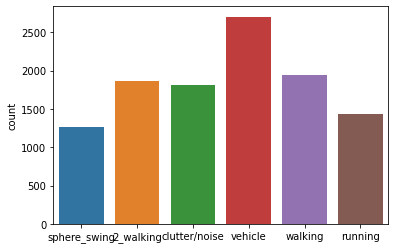

In [21]:
sns.countplot(y_train)

C:\Users\nyasha\anaconda3\envs\masters\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

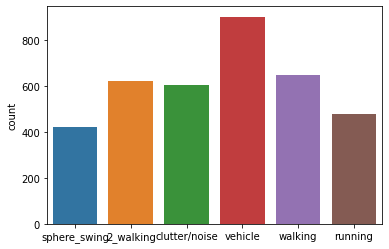

In [22]:
sns.countplot(y_test)

C:\Users\nyasha\anaconda3\envs\masters\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

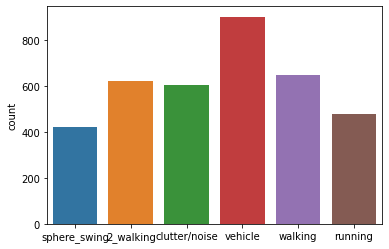

In [23]:
sns.countplot(y_val)

The dataset is not balanced and this will need to be adressed before training.

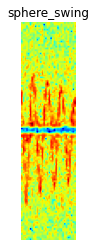

In [22]:
def plot_random_spectrogram():
    """Plots a random image from the training data"""
    image_num = np.random.randint(len(havs_data_norm))
    random_image = havs_data_norm[image_num]
    plt.imshow(random_image, cmap='jet')
    plt.title(f'{havs_labels[image_num]}')
    plt.axis('off')
    plt.show()

plot_random_spectrogram()


On plotting random images, there is evidence that some of the examples in the dataset are not clean. There are files with birds, there is a DC component, there seems to be mislabelling of some nature - the slice taken can be the end or beginning of am file.

In [23]:
walking_data = x_train[np.where(y_train == 'walking')]
vehicle_data = x_train[np.where(y_train == 'vehicle')]
clutter_data = x_train[np.where(y_train == 'clutter/noise')]
sphere_swing_data = x_train[np.where(y_train == 'sphere_swing')]
walking_2_data = x_train[np.where(y_train == '2_walking')]
running_data = x_train[np.where(y_train == 'running')]

In [24]:
avg_clutter_image = sum(clutter_data)/len(clutter_data)
avg_vehicle_image = sum(vehicle_data)/len(vehicle_data)
avg_walking_image = sum(walking_data)/len(walking_data)
avg_sphere_swing_image = sum(sphere_swing_data)/len(sphere_swing_data)
avg_running_image = sum(running_data)/len(running_data)
avg_walking_2_image = sum(walking_2_data)/len(walking_2_data)


ZeroDivisionError: division by zero

In [92]:
avg_clutter_image.shape

(128, 32)

In [24]:
my_dpi = 80
fig = plt.figure(figsize=(20, 10), dpi=my_dpi)
print(fig)

fig.suptitle('Plot of average image in each class', fontsize=20)

# Add plots
ax1 = fig.add_subplot(2, 3, 1)
cs = ax1.imshow(avg_clutter_image, cmap='jet')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax1.set_yticklabels([300, 200, 100, 0, 100, 200, 300])
ax1.set_xticks([0, 34, 69, 104])
ax1.set_xticklabels([0, 1, 2, 3])  

ax1.set_title('Clutter/Noise',   
             fontsize = 14) 

ax2 = fig.add_subplot(2, 3, 2)
ax2.imshow(avg_vehicle_image, cmap='jet')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_title('Vehicle',   
             fontsize = 14)
ax2.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax2.set_yticklabels([300, 200, 100, 0, 100, 200, 300])
ax2.set_xticks([0, 34, 69, 104])
ax2.set_xticklabels([0, 1, 2, 3])  

ax3 = fig.add_subplot(2, 3, 3)
ax3.imshow(avg_walking_image, cmap='jet')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Frequency (Hz)')
ax3.set_title('Walking',   
             fontsize = 14)
ax3.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax3.set_yticklabels([300, 200, 100, 0, 100, 200, 300]) 
ax3.set_xticks([0, 34, 69, 104])
ax3.set_xticklabels([0, 1, 2, 3])  

ax4 = fig.add_subplot(2, 3, 4)
ax4.imshow(avg_walking_2_image, cmap='jet')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Frequency (Hz)')
ax4.set_title('2_walking',   
             fontsize = 14) 
ax4.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax4.set_yticklabels([300, 200, 100, 0, 100, 200, 300])
ax4.set_xticks([0, 34, 69, 104])
ax4.set_xticklabels([0, 1, 2, 3])               

ax5 = fig.add_subplot(2, 3, 5)
ax5.imshow(avg_running_image, cmap='jet')
ax5.set_xlabel('Time (s)')
ax5.set_ylabel('Frequency (Hz)')
ax5.set_title('Running',   
             fontsize = 14)
ax5.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax5.set_yticklabels([300, 200, 100, 0, 100, 200, 300]) 
ax5.set_xticks([0, 34, 69, 104])
ax5.set_xticklabels([0, 1, 2, 3])              

ax6 = fig.add_subplot(2, 3, 6)
ax6.imshow(avg_sphere_swing_image, cmap='jet')
ax6.set_xlabel('Time (s)')
ax6.set_ylabel('Frequency (Hz)')
ax6.set_title('Shere Swing',   
             fontsize = 14) 
ax6.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax6.set_yticklabels([300, 200, 100, 0, 100, 200, 300])
ax6.set_xticks([0, 34, 69, 104])
ax6.set_xticklabels([0, 1, 2, 3]) 

fig.colorbar(cs)
fig.savefig('Subplot_avg_images.png')

Figure(1600x800)


NameError: name 'avg_clutter_image' is not defined

Text(0.5, 1.0, 'Walking')

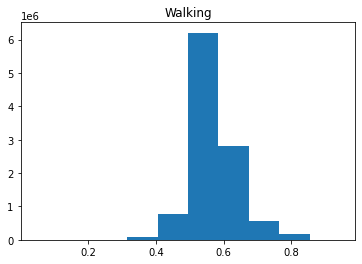

In [25]:
plt.hist(walking_data.flatten())
plt.title("Walking")

Text(0.5, 1.0, 'Running')

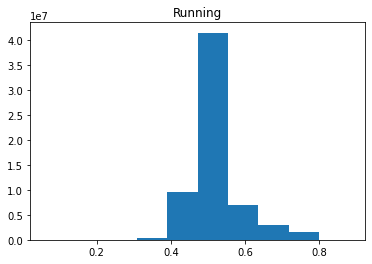

In [390]:
plt.hist(running_data.flatten()) 
plt.title("Running")

Text(0.5, 1.0, 'Vehicle')

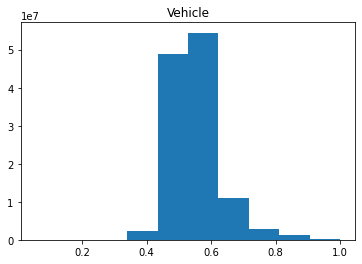

In [391]:
plt.hist(vehicle_data.flatten())
plt.title("Vehicle")

Text(0.5, 1.0, 'Clutter/noise')

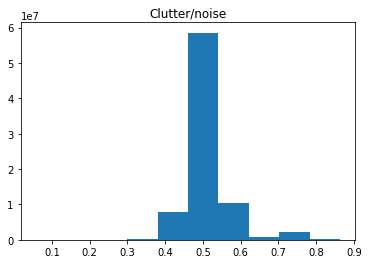

In [392]:
plt.hist(clutter_data.flatten())
plt.title("Clutter/noise")

Text(0.5, 1.0, 'Sphere Swing')

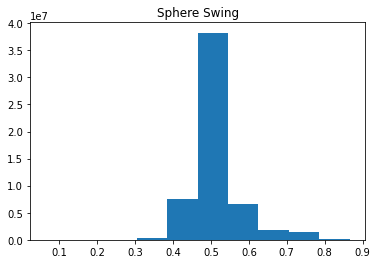

In [393]:
plt.hist(sphere_swing_data.flatten())
plt.title("Sphere Swing")

Text(0.5, 1.0, '2_Walking')

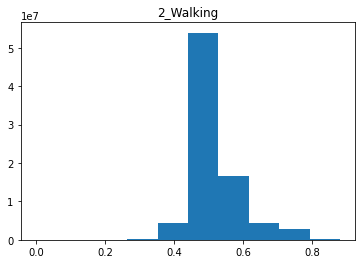

In [394]:
plt.hist(walking_2_data.flatten())
plt.title("2_Walking")

In [12]:
# save numpy array as npz file
from numpy import asarray
from numpy import savez_compressed

# # save to npy file
# savez_compressed('C:/Users/nyasha/Desktop/Masters-Nyasha/Processed Data/processed_data.npz', x_train=x_train, x_test=x_test, x_val=x_val, y_train=y_train, y_test=y_test, y_val=y_val)

# save to npy file cross validation data
savez_compressed('C:/Users/nyasha/Desktop/Masters-Nyasha/Processed Data/processed_data_cv.npz', x_train=x_train_cv, x_test=x_test_cv, y_train=y_train_cv, y_test=y_test_cv)

In [1]:
import scipy.io
mat = scipy.io.loadmat('time_stamps.mat')

In [8]:
mat['time_stamps_array']

array([[array(['2020-09-08_09-18-44-944'], dtype='<U23'),
        array(['2020-09-08_09-18-44-944'], dtype='<U23'),
        array(['2020-09-08_09-18-44-944'], dtype='<U23'), ...,
        array(['2020-09-08_17-39-02-537'], dtype='<U23'),
        array(['2020-09-08_17-39-02-537'], dtype='<U23'),
        array(['2020-09-08_17-39-02-537'], dtype='<U23')]], dtype=object)

In [14]:
import numpy as np
import h5py
f = h5py.File('classes_array.mat','r')
p = h5py.File('time_stamps.mat','r')
data_keys =  list(p.keys())
data_keys
data = f.get('classes_array')
num_of_examples = len(data)

classes = np.array([''.join(map(chr, np.squeeze(f[data[i,0]]))) for i in range(num_of_examples)]) # For converting to a NumPy array
# examples_data = np.array([np.transpose(f[data[i,0]]) for i in range(num_of_examples)])

In [15]:
f = h5py.File('time_stamps.mat','r')
data_keys =  list(p.keys())
data_keys
data = f.get('time_stamps_array')
num_of_examples = len(data)

time_stamps = np.array([''.join(map(chr, np.squeeze(f[data[i,0]]))) for i in range(num_of_examples)]) # For converting to a NumPy array

In [20]:
import pandas as pd
df = pd.DataFrame(list(zip(time_stamps, classes)),
               columns =['Time Stamps', 'Classes']
                )



In [44]:
unique_time_stamps = np.unique(time_stamps)
len(unique_time_stamps)


my_dict ={}

for time_stamp in unique_time_stamps:
    x = np.where(time_stamps==time_stamp)
    my_dict['time_stamp'] = classes[x]
    


In [59]:
time_stamps_without_date = np.array([time_stamp.split('_')[1] for time_stamp in time_stamps])

In [62]:
time_stamps

array(['2020-09-08_09-18-44-944', '2020-09-08_09-18-44-944',
       '2020-09-08_09-18-44-944', ..., '2020-09-08_17-39-02-537',
       '2020-09-08_17-39-02-537', '2020-09-08_17-39-02-537'], dtype='<U23')

<AxesSubplot:title={'center':'Recordings taken on 202-09-08'}, xlabel='Time', ylabel='Number of Recordings'>

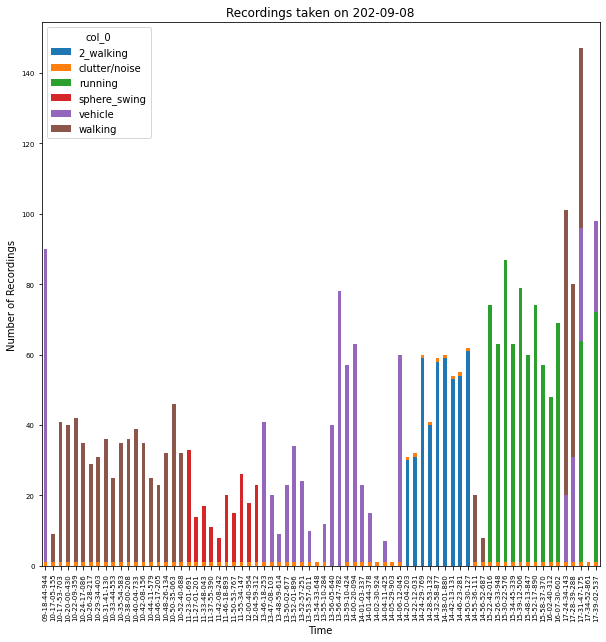

In [68]:
pd.crosstab(time_stamps_without_date, classes).plot(kind='bar', stacked=True, figsize=(10,10), 
                                                    fontsize=7, xlabel='Time', ylabel='Number of Recordings',
                                                    title='Recordings taken on 202-09-08')

In [49]:
pd.crosstab(time_stamps, classes)

col_0,2_walking,clutter/noise,running,sphere_swing,vehicle,walking
row_0,,,,,,
2020-09-08_09-18-44-944,0,1,0,0,89,0
2020-09-08_10-17-05-155,0,1,0,0,0,8
2020-09-08_10-17-53-703,0,1,0,0,0,40
2020-09-08_10-20-00-430,0,1,0,0,0,39
2020-09-08_10-22-09-359,0,1,0,0,0,41
...,...,...,...,...,...,...
2020-09-08_17-24-34-143,0,1,0,0,19,81
2020-09-08_17-28-39-288,0,1,0,0,30,49
2020-09-08_17-31-47-175,0,1,63,0,32,51


<BarContainer object of 2968 artists>

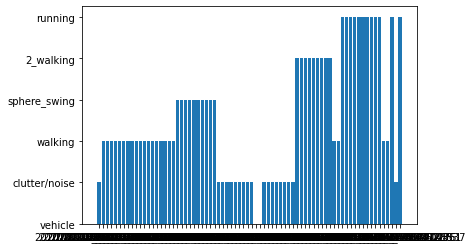

In [23]:
import matplotlib.pyplot as plt
plt.bar(time_stamps, classes)

In [4]:
def get_matlab_data(file_path, is_label: bool):
    """reading a .mat file to extract the images or the labels"""
    with h5py.File(file_path, 'r') as f:
        print(f"Reading {file_path} . . . ")
        data_keys =  list(f.keys())
        HAVSDatasetStruct = f[data_keys[1]] 
        data = HAVSDatasetStruct['Data']
        labels = HAVSDatasetStruct['Label']
        num_of_examples = len(data)

        print(num_of_examples)
        if is_label: # If label file
            labels_data =  np.array([''.join(map(chr, np.squeeze(f[labels[i,0]]))) for i in range(num_of_examples)])
            print(f"Completed reading {file_path} labels data")

            return labels_data  

        else: # If data file
            examples_data = np.array([np.transpose(f[data[i,0]]) for i in range(num_of_examples)])
            print(f"Completed reading {file_path} examples data")

            return examples_data

array([[<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>],
       ...,
       [<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>]], dtype=object)